<h1>Pre-1790 Data Analysis</h1>

- Barplot of debt distribution 

- Debt distribution by gender

- Top ten richest individual debt holders - biographies 

If time: find out if any const. convention or society of the cincinatti members had debt holdings 

<h2>Debt Distribution</h2>

Two barplots: 
1. The total amount of debt held by each bracket 
2. The percentage of total debt held by each bracket 
 

In [2]:
# import necessary packages and import aggregated debt file 
import pandas  
agg_debt = pandas.read_csv("data/agg_debt_grouped.csv")

# remove rows where no name exists 
agg_debt.drop(agg_debt.loc[agg_debt["to whom due | first name"].isna() & agg_debt["to whom due | last name"].isna()].index, inplace=True)

# new column for total amount of debt
agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]] = agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]].fillna(0)
agg_debt["amount_total"] = agg_debt["amount | dollars"] + agg_debt["amount in specie | dollars"] + agg_debt["amount in specie | cents"]
agg_debt.head()

# sort by amount of debt 
agg_debt_sorted = agg_debt.sort_values(by="amount_total", ascending=False)
agg_debt_sorted.head()


C:\Users\david\AppData\Local\Temp\ipykernel_38864\3991032809.py:3: DtypeWarning: Columns (1,7,9,10,12,14,15,19,20,21,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  agg_debt = pandas.read_csv("data/agg_debt_grouped.csv")


,Unnamed: 0,letter,date of the certificate | month,date of the certificate | day,date of the certificate | year,to whom due | first name,to whom due | last name,to whom due | title,time when the debt became due | month,time when the debt became due | day,...,amount in specie | dollars,amount in specie | cents,amount | 8th,delivered | month,delivered | day,delivered | year,total dollars | notes,total dollars | notes.1,final_agg_debt index,amount_total
91257,91257,NaN,4.0,17.0,1780.0,John Jacob,Faish,NaN,NaN,NaN,...,250.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,186282 | 186283 | 186284 | 186285 | 186286 | 1...,464750.0000
91844,91844,NaN,9.0,27.0,1780.0,Mons,Monbos,NaN,NaN,NaN,...,125.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,190662 | 190663 | 190664 | 190665 | 190666 | 1...,219125.0000
97417,97417,NaN,1.0,8.0,1780.0,Jesse Taylor,NaN,NaN,NaN,NaN,...,1920.4440,0.0,NaN,NaN,NaN,NaN,NaN,NaN,202275 | 202276 | 202277 | 202278,206320.4440
68278,68278,NaN,12.0,31.0,1779.0,William,Dennie,NaN,NaN,NaN,...,341.8056,0.0,NaN,NaN,NaN,NaN,NaN,NaN,136206 | 136207 | 136208 | 136209 | 136210 | 1...,200341.8056
89596,89596,NaN,12.0,6.0,1779.0,Samuel,Delap,NaN,NaN,NaN,...,151.1667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180875 | 180876 | 180877 | 180878 | 180879 | 1...,196151.1667


In [58]:
# split into 4 groups
import numpy as np 
agg_debt_split = np.array_split(agg_debt_sorted, 4)
amounts = [round(agg_debt_split[i]["amount_total"].sum()) for i in range(4)]
for i in range(4):
    print(amounts[i])

65248336
8582144
2439756
442395


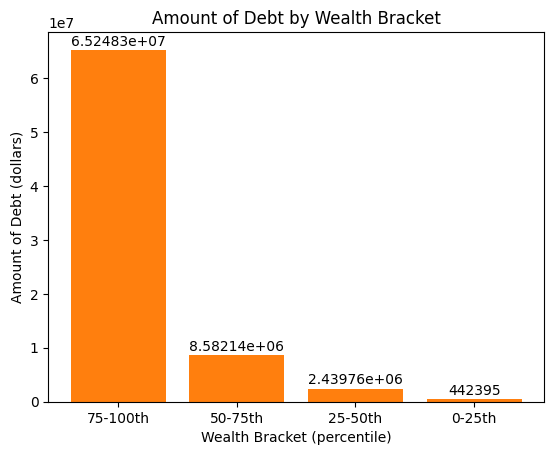

In [59]:
# graph amount of debt held by each wealth bracket 
import matplotlib.pyplot as plt
plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], amounts)

# add labels 
plt.xlabel("Wealth Bracket (percentile)")
plt.ylabel("Amount of Debt (dollars)")
plt.bar_label(plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], amounts), padding=1)
plt.title("Amount of Debt by Wealth Bracket")
plt.savefig("analysis/debt_by_wealth_bracket.png")
plt.show()

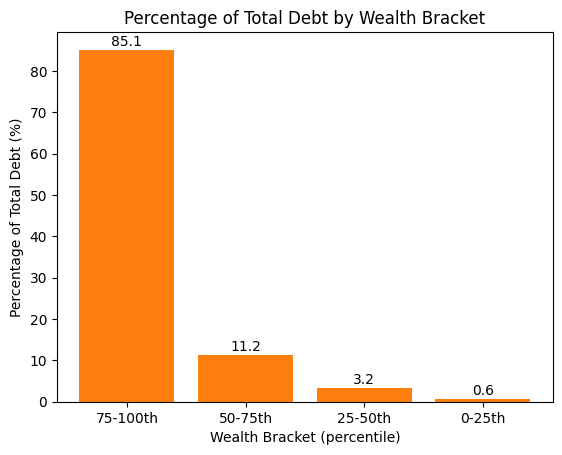

In [61]:
# calculate percentage of total wealth each bracket holds 
total_amt = agg_debt["amount_total"].sum() 
percentages = [round(((amounts[i] / total_amt) * 100), 1) for i in range(4)] 

# graph percentages # add labels 
plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages)
plt.xlabel("Wealth Bracket (percentile)")
plt.ylabel("Percentage of Total Debt (%)")
plt.bar_label(plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages), padding=1)
plt.title("Percentage of Total Debt by Wealth Bracket")
plt.savefig("analysis/percent_debt_by_wealth_bracket.png")
plt.show()

<h2>Women Versus Men</h2>
Barplot: compare amount of debt held by women versus men using NLTK 

In [49]:
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)

# cast type of first name column to string
agg_debt["to whom due | first name"] = agg_debt["to whom due | first name"].astype(str)

In [50]:
def count_genders(name):
    if d.get_gender(name, country="usa") == "male":
        return "Male"
    elif d.get_gender(name, country="usa") == "female":
        return "Female"
    else:
        return "Unknown"

In [51]:
# run gender detector on entire dataset 
agg_debt["gender_prediction"] = agg_debt["to whom due | first name"].apply(count_genders) 
count = agg_debt["gender_prediction"].value_counts(normalize=True) * 100
print(count)

gender_prediction
Male       49.917913
Unknown    45.916567
Female      4.165519
Name: proportion, dtype: float64


[Text(0, 1, '49.9179'), Text(0, 1, '45.9166'), Text(0, 1, '4.16552')]

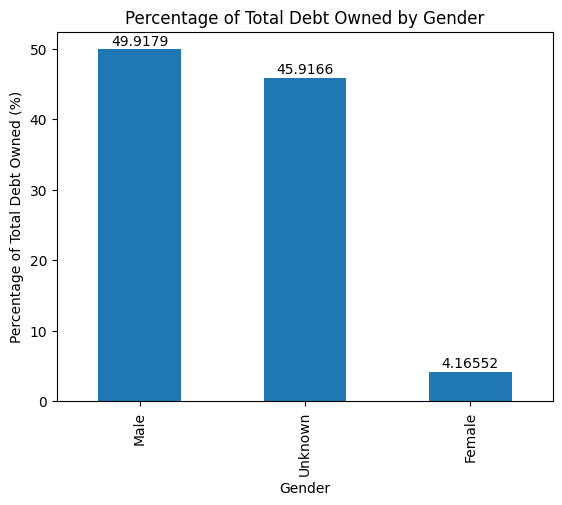

In [52]:
# graph 
ax = count.plot.bar(xlabel="Gender", ylabel="Percentage of Total Debt Owned (%)", title="Percentage of Total Debt Owned by Gender")
ax.bar_label(ax.containers[0], padding=1)

<h2>Top Ten Debt Holders</h2>

I researched the top ten debt holders from the pre-1790 data to find additional information and individual biographies. 

https://docs.google.com/document/d/1osUkB6xTnMBxe5OmWnL07VEh2e97iFr1a9YNku51MBc/edit?usp=sharing 

In [69]:
# get the top ten debt holders from sorted dataset
richest_names = agg_debt_sorted.head(10)[["to whom due | first name", "to whom due | last name", "amount_total", "state", "date of the certificate | year"]]
richest_names

,to whom due | first name,to whom due | last name,amount_total,state,date of the certificate | year
91257,John Jacob,Faish,464750.0000,pa,1780.0
91844,Mons,Monbos,219125.0000,pa,1780.0
97417,Jesse Taylor,NaN,206320.4440,va,1780.0
68278,William,Dennie,200341.8056,ma,1779.0
89596,Samuel,Delap,196151.1667,pa,1779.0
79217,John,Stevens,185925.0000,nj,1780.0
90159,James,Logan,172058.0000,pa,1780.0
91756,Jonathan,Hudson,171125.0000,pa,1780.0
89957,Ephraim,Blaine,156765.5556,pa,1780.0
91143,John,Benezett,135025.0000,pa,1780.0


In [67]:
agg_debt.columns

Index(['Unnamed: 0', 'letter', 'date of the certificate | month',
       'date of the certificate | day', 'date of the certificate | year',
       'to whom due | first name', 'to whom due | last name',
       'to whom due | title', 'time when the debt became due | month',
       'time when the debt became due | day',
       'time when the debt became due | year', 'amount | dollars',
       'amount | 90th', 'line strike through? | yes?',
       'line strike through? | note', 'notes', 'state', 'org_file',
       'org_index', 'to whom due | title.1', 'to whom due | first name.1',
       'to whom due | last name.1', 'amount | 10th', 'exchange',
       'amount in specie | dollars', 'amount in specie | cents',
       'amount | 8th', 'delivered | month', 'delivered | day',
       'delivered | year', 'total dollars | notes', 'total dollars | notes.1',
       'final_agg_debt index', 'amount_total', 'gender_prediction'],
      dtype='object')

<h2>Society of Cincinatti Members and Debt Holdings</h2>

1. Find all members of the Society of Cincinatti who held debt - dataframe
2. Find out the percentage of total debt owned by society members - return a value

In [251]:
import re 

# remove military titles 
def remove_titles(officer):
    officer = officer.replace("Surgeonâ€™s", "").replace("Surgeon General", "") #remove doctor titles 

    if '.' in officer:
        return re.sub(',[^.]+.', ',', officer) 

    return officer

In [252]:

def clean(name_list):
    i = 0
    while i < len(name_list):
        # remove parantheses and everything inside them
        name_list[i] = re.sub("\(.*?\)","", name_list[i])

        # remove '... and ...' 
        name_list[i] = name_list[i].replace(" and ", "")

        # remove [...]
        name_list[i] = re.sub("\[.*?\]","", name_list[i])

        # remove titles 
        name_list[i] = remove_titles(name_list[i])

        # remove endspaces 
        name_list[i] = name_list[i].strip()

        i += 1
    
    return name_list        

In [254]:
# open file with all members of the society
all_officers = open("society_members/all_officers_ari.txt", "r") 
all_officers = all_officers.read().splitlines() 
all_officers = [value for value in all_officers if value != '']

# get only massachusetts officers (state with most unclear names) 
mass_officers = []
for officer in all_officers:
    state = officer[officer.find("(")+1:officer.find(")")]
    if state == "Massachusetts":
        mass_officers.append(officer)

# remove military titles 
i = 0
while i < len(mass_officers):
    mass_officers[i] = remove_titles(remove_titles(mass_officers[i])) # running twice handles those who have two titles 
    mass_officers[i] = re.sub("\(.*?\)","", mass_officers[i])
    i += 1

# swap first and last names 
i = 0
while i < len(mass_officers):
    full_name_swapped = mass_officers[i].split(",")[1] + mass_officers[i].split(",")[0]
    full_name_swapped = full_name_swapped.strip()
    mass_officers[i] = full_name_swapped
    i += 1

# run cleaning function 
mass_officers = clean(mass_officers) 

print(mass_officers)

['Stephen Abbott', 'Amos Adams', 'Henry Adams', 'Samuel Adams', 'William Albee', 'Judah Alden', 'Nathaniel Alexander', 'John Allan', 'Noah Allen', 'Job Alvord', 'Jotham Ames', 'Samuel Armstrong', 'James Avery', 'Stephen Badlam', 'Richard Bagnell', 'Adams Bailey', 'Luther Bailey', 'John Bailey', 'Jeduthan Baldwin', 'Lebbeus Ball', 'James Bancroft', 'Ebenezer Bancroft', 'Edmund Bancroft', 'Seth Banister', 'John Barker', 'Joel Barlow', 'Rufus Barney', 'Mate Josiah Bartlett', 'Barachiah Bassett', 'Fortunatus Bassett', 'Joseph Bates', 'Hodijah Baylies', 'Samuel Benjamin', 'Silas Bent', 'Timothy Bigelow', 'EdwardBlake', 'Thomas Theodore Bliss', 'William Bond', 'Ralph Hart Bowles', 'Samuel Bowman', 'Solomon Bowman', 'Robert Bradford', 'Samuel Bradford', 'Gamaliel Bradford', 'GamalielBradford', 'David Bradley', 'John Brooks', 'Benjamin Brown', 'Oliver Brown', 'Edward Bugbee', 'John Bull', 'Silas Burbank', 'Henry Burbeck', 'William Burbeck', 'John Burges', 'John Burnham', 'James Buxton', 'John 

In [319]:
# import society members from each state
total_members = 0 
meta_register = {} # store all members in a dictionary with state as key and list of members as value

ct_file = open("society_members/connecticut.txt", "r")
ct_members = ct_file.read().split(",")
ct_members = clean(ct_members)
meta_register["ct"] = ct_members
total_members += len(ct_members)
#ct_members

de_file = open("society_members/delaware.txt", "r") 
de_members = de_file.read().split(",")
de_members = clean(de_members)
meta_register["de"] = de_members 
total_members += len(de_members)
#de_members

ga_file = open("society_members/georgia.txt", "r")
ga_members = ga_file.read().split(",")
ga_members = clean(ga_members)
meta_register["ga"] = ga_members 
total_members += len(ga_members)
#ga_members 

md_file = open("society_members/maryland.txt", "r")
md_members = md_file.read().split(",")
md_members = clean(md_members)
meta_register["md"] = md_members
total_members += len(md_members)
#md_members

nh_file = open("society_members/new_hampshire.txt", "r")
nh_members = nh_file.read().split(",")
nh_members = clean(nh_members)
meta_register["nh"] = nh_members
total_members += len(nh_members)
#nh_members

nj_file = open("society_members/new_jersey.txt", "r")
nj_members = nj_file.read().split(",")
nj_members = clean(nj_members)
meta_register["nj"] = nj_members
total_members += len(nj_members)
#nj_members 

ny_file = open("society_members/new_york.txt", "r")
ny_members = ny_file.read().split(",")
ny_members = clean(ny_members)
meta_register["ny"] = ny_members
total_members += len(ny_members)
#ny_members

pa_file = open("society_members/pennsylvania.txt", "r")
pa_members = pa_file.read().split(",")
pa_members = clean(pa_members)
meta_register["pa"] = pa_members
total_members += len(pa_members)
#pa_members

ri_file = open("society_members/rhode_island.txt", "r")
ri_members = ri_file.read().split(",")
ri_members = clean(ri_members)
meta_register["ri"] = ri_members
total_members += len(ri_members)
#ri_members

va_file = open("society_members/virginia.txt", "r")
va_members = va_file.read().split(",")
va_members = clean(va_members)
meta_register["va"] = va_members
total_members += len(va_members)
#va_members

nc_file = open("society_members/north_carolina.txt", "r")
nc_members = nc_file.read().split(",")
nc_members = clean(nc_members)
meta_register["nc"] = nc_members
total_members += len(nc_members)
#nc_members

In [336]:
# create dataframe with only society members
members_owned_debt = pandas.DataFrame(columns=["full_name", "amount_total", "state", "org_file"])
for state in meta_register:
    society_members_per_state = agg_debt[agg_debt["full_name"].isin(meta_register[state]) & agg_debt["state"].isin([state])]
    members_owned_debt = pandas.concat([members_owned_debt, society_members_per_state[["full_name", "amount_total", "state", "org_file"]]], ignore_index=True)
members_owned_debt.tail()

,full_name,amount_total,state,org_file
497,Jeremiah Olney,2.0,ri,liquidated_debt_certificates_RI.xlsx
498,William Jones,6.0,ri,liquidated_debt_certificates_RI.xlsx
499,Silas Talbot,75.0,ri,liquidated_debt_certificates_RI.xlsx
500,William Tew,8.0,ri,liquidated_debt_certificates_RI.xlsx
501,James Mitchell Varnum,977.0,ri,liquidated_debt_certificates_RI.xlsx


In [337]:
# find out how many members own debt
num_owned_debt = len(members_owned_debt["full_name"].unique())
print(num_owned_debt)

172


In [338]:
# group by name and state
funcs = {"amount_total": "sum", "org_file": "first"}
members_owned_debt = members_owned_debt.groupby(["full_name", "state"]).agg(funcs).reset_index()
members_owned_debt.tail()

,full_name,state,amount_total,org_file
168,William Smallwood,md,1042.75000,loan_office_certificates_9_states.xlsx
169,William Stewart,ny,445.00000,liquidated_debt_certificates_NY.xlsx
170,William Tew,ri,12.00000,liquidated_debt_certificates_RI.xlsx
171,William Thompson,pa,2358.09305,liquidated_debt_certificates_PA_stelle.xlsx
172,Zebulon Pike,pa,15.00000,liquidated_debt_certificates_PA_stelle.xlsx


In [339]:
# save to csv
members_owned_debt.to_csv("analysis/members_owned_debt.csv")

In [324]:
# calculate the percentage of cincinatti members that owned debt 
(num_owned_debt / total_members) * 100

17.131474103585656